In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [101]:
data = "./Documentation/Data/inmuebles_bogota_2.csv"
df = pd.read_csv(data)
df

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millon
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360000000,360.00
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000,$,670000000,670.00
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,$,1120000000,1120.00
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000,$,890000000,890.00
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000,$,970000000,970.00
...,...,...,...,...,...,...,...,...,...,...,...
9515,Apartamento,Apartamento en venta en Kennedy,3,2,70,Kennedy,Kennedy Central,$ 290.000.000,$,290000000,290.00
9516,Apartamento,Apartamento en venta en Parque Central Bavaria,2,2,100,Parque Central Bavaria,SANTA FE: Las Nieves + Sagrado Corazón,$ 670.000.000,$,670000000,670.00
9517,Local,Local en venta en Restrepo,8,6,383,Restrepo,Restrepo,$ 900.000.000,$,900000000,900.00
9518,Casa,Casa en venta en Engativa,3,2,183,Engativa,Engativá,$ 335.000.000,$,335000000,335.00


c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

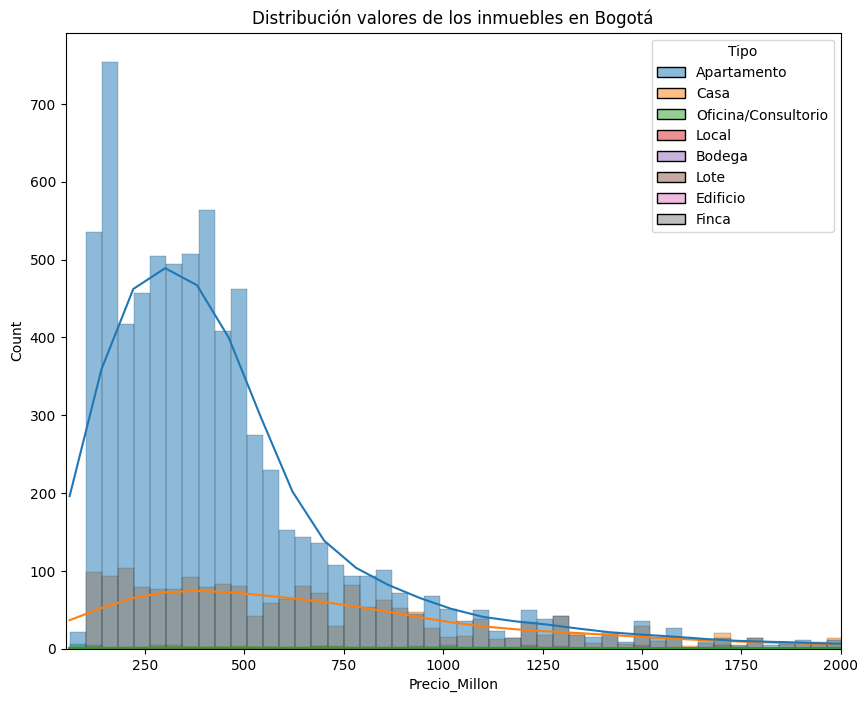

In [102]:
plt.figure(figsize = (10,8))
grafica = sns.histplot(data=df, x='Precio_Millon',kde = True, hue='Tipo')
grafica.set_title('Distribución valores de los inmuebles en Bogotá')
plt.xlim(50,2000)
plt.show()

# DESCARGAR LA FIGURA QUE GENERAMOS DEL DATAFRAME
# plt.savefig('Figura.png')

# DESAFIO

1. Estudiar mejor el histograma de valores, seleccionar 3 tipos de inmuebles (Refinar el gráfico: Titulos, aummetar el tamaño de los labels, colores, conclusión de la información).
2. Precio del m2 por barrio y hacer el grafico mas adecuado para esta nueva variable.

In [103]:
# 
df['Valor_m2_Millon'] =  df['Precio_Millon']/df['Area'] 
df.sample(3)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millon,Valor_m2_Millon
6509,Apartamento,Apartamento en venta en Usaquén,4,2,92,Usaquén,Usaquén,$ 491.000.000,$,491000000,491.0,5.336957
8081,Apartamento,Apartamento en venta en San Patricio,1,1,54,San Patricio,USAQUÉN: Country Club + Santa Bárbara,$ 420.000.000,$,420000000,420.0,7.777778
7697,Apartamento,Apartamento en venta en Cedritos,6,3,189,Cedritos,Usaquén,$ 550.000.000,$,550000000,550.0,2.910053


In [104]:
# Filtra solo las columnas numéricas
ColumnasPromedio = df.select_dtypes(include=['int', 'float']).columns
df.groupby('Barrio')[ColumnasPromedio].mean().reset_index()


,Barrio,Habitaciones,Banos,Area,Precio,Precio_Millon,Valor_m2_Millon
0,Alameda,3.000000,2.000000,97.000000,5.800000e+08,580.000000,5.979381
1,Alhambra,3.000000,2.941176,190.411765,7.523529e+08,752.352941,4.326836
2,Andes Norte,3.000000,2.857143,124.857143,7.095714e+08,709.571429,6.050350
3,Antonio Nariño,4.312500,2.500000,163.062500,4.592219e+08,459.221875,3.530638
4,Barrancas,2.866667,2.133333,70.200000,3.141333e+08,314.133333,4.415957
...,...,...,...,...,...,...,...
144,Villa Maria,4.692308,3.692308,207.153846,4.028462e+08,402.846154,2.044511
145,Villas De Granada,3.454545,2.318182,86.590909,2.823011e+08,282.301136,3.168840
146,Villemar,2.944444,2.055556,76.888889,3.038333e+08,303.833333,3.989697
147,Zona Franca,2.000000,1.000000,54.000000,1.600000e+08,160.000000,2.962963


In [105]:
# HALLAMOS EL PROMEDIO APARTIR DE LA SUMA DE TODOS LOS DATOS
# DIVIDIDO ENTRE LA CANTIDAD DE DATOS. MAS PRECISO QUE USAR EL .mean()

ColumnasPromedio2 = df.select_dtypes(include=['int', 'float']).columns
DatosBarrio = df.groupby('Barrio')[ColumnasPromedio2].sum()
DatosBarrio

,Habitaciones,Banos,Area,Precio,Precio_Millon,Valor_m2_Millon
Barrio,,,,,,
Alameda,3,2,97,580000000,580.000000,5.979381
Alhambra,51,50,3237,12790000000,12790.000000,73.556204
Andes Norte,21,20,874,4967000000,4967.000000,42.352453
Antonio Nariño,207,120,7827,22042650000,22042.650000,169.470608
Barrancas,43,32,1053,4712000000,4712.000000,66.239361
...,...,...,...,...,...,...
Villa Maria,61,48,2693,5237000000,5237.000000,26.578643
Villas De Granada,76,51,1905,6210625000,6210.625000,69.714480
Villemar,53,37,1384,5469000000,5469.000000,71.814550


In [106]:
DatosBarrio['Valor_m2_Barrio'] = DatosBarrio['Precio_Millon'] / DatosBarrio['Area']
DatosBarrio 

,Habitaciones,Banos,Area,Precio,Precio_Millon,Valor_m2_Millon,Valor_m2_Barrio
Barrio,,,,,,,
Alameda,3,2,97,580000000,580.000000,5.979381,5.979381
Alhambra,51,50,3237,12790000000,12790.000000,73.556204,3.951189
Andes Norte,21,20,874,4967000000,4967.000000,42.352453,5.683066
Antonio Nariño,207,120,7827,22042650000,22042.650000,169.470608,2.816232
Barrancas,43,32,1053,4712000000,4712.000000,66.239361,4.474834
...,...,...,...,...,...,...,...
Villa Maria,61,48,2693,5237000000,5237.000000,26.578643,1.944671
Villas De Granada,76,51,1905,6210625000,6210.625000,69.714480,3.260171
Villemar,53,37,1384,5469000000,5469.000000,71.814550,3.951590
